In [15]:
import pandas as pd

In [16]:
df = pd.read_excel('林生斌再婚后.xlsx')

In [17]:
df

,标题,from,txt
0,宁宁ldn,01月22日\n \n ...,《林生斌又出事了？这次，我只心疼她》大家还记得林生斌吗？互联网上最大的翻车事件引发舆论地震，...
1,芒种果果,01月22日\n \n ...,和平精英真的忍不住了，毛小毛有些粉丝你们是真的贱啊，从昨晚凌晨开始就有一级号专门搜了超话进来...
2,八字命理师小迪,01月22日\n \n ...,像林生斌这种局里比劫印一定会旺...身旺无依的一个特点就是 以自我为中心，凡事都考虑自己，自...
3,三农粉,01月21日 20:46\n \n ...,如何看待杭州保姆纵火案男主林生斌再婚生女，发文称她回来了？ ​
4,夏夜茉莉呀,01月21日 17:19\n \n ...,千惠啊，你演戏不过是为了要我们相信林生斌没事儿。到底真林假林，纸包不住火，总能查清楚的，谎言...
...,...,...,...
919,寒冰的泪,2021年11月05日 18:06\n \n ...,刘信达你为了高流量胡编滥造，为了圈粉圈钱毫无底线，没有一点真凭实据，全靠网络断案，别人不起诉...
920,永恒了得,2021年11月05日 18:04\n \n ...,林生斌不敢出来解释全国网民对火案朱小贞及孩子去世的几十种疑问吗？怕漏馅吗？不解释就是认了那些...
921,倾澜之悦,2021年11月05日 17:15\n \n ...,#宋祖德 林生斌# 这个不用怀疑是同一个人，在为了流量蹭热度，现在回归服装话题了，真会演 ​
922,寒冰的泪,2021年11月05日 17:09\n \n ...,陈中杰估计得抑郁症了，他说号封之日钱江见，真不明白他怎么想的，我感觉他越来越不对劲了，一把年...


In [18]:
content = df['txt']

In [19]:
content.drop_duplicates(keep='first', inplace=True)

In [20]:
content

0      《林生斌又出事了？这次，我只心疼她》大家还记得林生斌吗？互联网上最大的翻车事件引发舆论地震，...
1      和平精英真的忍不住了，毛小毛有些粉丝你们是真的贱啊，从昨晚凌晨开始就有一级号专门搜了超话进来...
2      像林生斌这种局里比劫印一定会旺...身旺无依的一个特点就是 以自我为中心，凡事都考虑自己，自...
3                        如何看待杭州保姆纵火案男主林生斌再婚生女，发文称她回来了？ ​
4      千惠啊，你演戏不过是为了要我们相信林生斌没事儿。到底真林假林，纸包不住火，总能查清楚的，谎言...
                             ...                        
919    刘信达你为了高流量胡编滥造，为了圈粉圈钱毫无底线，没有一点真凭实据，全靠网络断案，别人不起诉...
920    林生斌不敢出来解释全国网民对火案朱小贞及孩子去世的几十种疑问吗？怕漏馅吗？不解释就是认了那些...
921       #宋祖德 林生斌# 这个不用怀疑是同一个人，在为了流量蹭热度，现在回归服装话题了，真会演 ​
922    陈中杰估计得抑郁症了，他说号封之日钱江见，真不明白他怎么想的，我感觉他越来越不对劲了，一把年...
923                             @-林生斌- 哈喽？在吗？什么时候给我退款？ ​
Name: txt, Length: 858, dtype: object

In [22]:
# coding=utf-8
import jieba
import re
import time
from collections import Counter

#------------------------------------中文分词------------------------------------
cut_words = ""
all_words = ""
f = open('林生斌再婚后-fenci.txt', 'w', encoding='utf-8')

for line in content:
    line = line.strip('\n')
    #停用词过滤
    line = re.sub('[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', "", line)
    seg_list = jieba.cut(line, cut_all=False)
    cut_words = (" ".join(seg_list))

    #计算关键词
    all_words = cut_words.split()
    c = Counter()
    for x in all_words:
        if len(x)>1 and x != '\r\n':
            c[x] += 1
    #Top50
    output = ""
    #print('\n词频统计结果：')
    for (k,v) in c.most_common():
        #print("%s:%d"%(k,v))
        output += k + " "
    
    f.write(output+"\n")
else:
    f.close()

<>:15: DeprecationWarning: invalid escape sequence \s
<>:15: DeprecationWarning: invalid escape sequence \s
<>:15: DeprecationWarning: invalid escape sequence \s
<ipython-input-22-7fcf6e19f197>:15: DeprecationWarning: invalid escape sequence \s
  line = re.sub('[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', "", line)


In [23]:
stop_words = [] 
    
with open("stopwords_cn.txt", 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        stop_words.append(line.strip()) 

In [26]:
#coding: utf-8
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#---------------------  第一步 读取数据(已分词)  ----------------------
corpus = []

# 读取预料 一行预料为一个文档
for line in open('林生斌再婚.txt', 'r',encoding='utf-8').readlines():
    corpus.append(line.strip())
        
#-----------------------  第二步 计算TF-IDF值  ----------------------- 
# 设置特征数
n_features = 2000

tf_vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words=stop_words,
                                max_df = 0.99,
                                min_df = 0.002) #去除文档内出现几率过大或过小的词汇

tf = tf_vectorizer.fit_transform(corpus)

print(tf.shape)
print(tf)

D:\rgzn\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['11', '12', '13', '14', '15', '16', '17', '18', '19', '1a', '1b', '1c', '1d', '1e', '1f', '1g', '1h', '1i', '1o', '21', '210', '22', '23', '24', '25', '26', '27', '28', '2a', '2b', '2c', '2d', '2e', '2f', '2g', '2h', '2i', '2j', '31', '310', '3a', '3b', '3c', '3d', '3e', '3f', '3g', '3h', '4a', '4b', '4c', '4d', '4e', '5a', '5b', '5d', '5e', '5f', 'iii', 'lex', 'li', 'ng昉', 'zxfitl'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(866, 2000)
  (0, 1430)	0.1891544140940316
  (0, 1368)	0.1526534174192868
  (0, 638)	0.2969476150452631
  (0, 537)	0.32254294313441084
  (0, 1662)	0.26108673429915447
  (0, 841)	0.35659336709459355
  (0, 146)	0.17153147895368323
  (0, 1602)	0.2929508647536377
  (0, 152)	0.329366102860372
  (0, 1753)	0.329366102860372
  (0, 879)	0.329366102860372
  (0, 362)	0.329366102860372
  (0, 1193)	0.06487847843132408
  (1, 242)	0.37116349297018914
  (1, 791)	0.13414867840475722
  (1, 93)	0.3386008238108967
  (1, 713)	0.37116349297018914
  (1, 705)	0.3581793174105949
  (1, 355)	0.3475704735171953
  (1, 581)	0.3123009188284707
  (1, 1113)	0.3581793174105949
  (1, 1510)	0.23032821220067204
  (1, 1430)	0.18999567904870449
  (1, 1368)	0.15333234405655816
  (1, 1193)	0.06516702570355237
  :	:
  (865, 1263)	0.07084056725715494
  (865, 1278)	0.1325461487980463
  (865, 1759)	0.1279699265538959
  (865, 700)	0.08358561191928522
  (865, 614)	0.5484131125965028
  (865, 534)	0.18280437086550094
  (865, 1763)	0.

Features length: 9480
Start Kmeans:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[1 1 2 0 1 1 2 2 2 2 2 0 2 2 2 2 1 2 1 1 1 0 2 2 1 1 2 1 1 2 1 1 0 1 1 2 2
 1 0 2 2 2 1 2 1 2 2 2 1 2 1 2 2 1 1 2 1 2 2 2 2 1 2 2 2 1 0 2 0 2 2 2 2 2
 1 1 1 1 2 1 2 2 2 1 1 1 1 2 1 2 1 2 2 1 2 2 2 1 1 1 0 1 1 2 1 1 1 2 1 2 2
 1 2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 0 2 2 1 1 2 2 2 2 1 2 2 1 1 0 1 2 2 1
 0 1 1 1 2 1 2 1 1 2 2 1 1 1 2 2 1 0 2 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 2 2 2
 2 2 2 2 1 1 1 2 1 1 1 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 0 2 1 1 2 2 1 2 1 1 1 1 1 2 1 0 2 2 0 1 2 2 2 1 1 2 0 1 2 0 2 2 2 2
 2 2 1 1 2 2 2 1 1 2 2 1 1 1 2 1 0 2 1 2 2 2 2 2 0 1 1 1 1 1 2 1 2 2 1 2 2
 2 1 0 1 2 2 1 1 2 0 2 1 1 1 1 0 1 2 1 2 1 2 1 2 0 0 2 2 2 2 1 2 2 2 1 1 1
 2 2 2 0 1 2 2 2 0 2 2 2 2 2 1 2 1 2 2 1 1 1 2 1 2 2 2 2 1 2 0 2 1 1 2 1 1
 0 2 2 1 2 2 2 2 1 0 

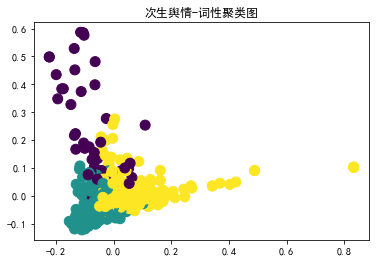

In [31]:
# coding=utf-8
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


if __name__ == "__main__":

    #########################################################################
    #                           第一步 计算TFIDF

    # 文档预料 空格连接
    corpus = []

    # 读取预料 一行预料为一个文档
    for line in open('林生斌再婚.txt', 'r',encoding='utf-8').readlines():
        corpus.append(line.strip())
    # 将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
    vectorizer = CountVectorizer()

    # 该类会统计每个词语的tf-idf权值
    transformer = TfidfTransformer()

    # 第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
    tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
    # 获取词袋模型中的所有词语
    word = vectorizer.get_feature_names()

    # 将tf-idf矩阵抽取出来 元素w[i][j]表示j词在i类文本中的tf-idf权重
    weight = tfidf.toarray()

    # 打印特征向量文本内容
    print('Features length: ' + str(len(word)))

    #
    ########################################################################
    #                               第二步 聚类Kmeans

    print('Start Kmeans:')
    from sklearn.cluster import KMeans

    clf = KMeans(n_clusters=3)
    print(clf)
    pre = clf.fit_predict(weight)
    print(pre)

    # 中心点
    print(clf.cluster_centers_)
    print(clf.inertia_)

    ########################################################################
    #                               第三步 图形输出 降维

    from sklearn.decomposition import PCA

    pca = PCA(n_components=3)  # 输出两维
    newData = pca.fit_transform(weight)  # 载入N维

    x = [n[0] for n in newData]
    y = [n[1] for n in newData]
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 支持中文
    plt.rcParams['axes.unicode_minus'] = False
    plt.scatter(x, y, c=pre, s=100)
    # plt.legend()
    plt.title("次生舆情-词性聚类图")
    plt.savefig('次生舆情-词性聚类图.jpg')
    plt.show()

In [32]:
#-------------------------  第三步 LDA分析  ------------------------ 
from sklearn.decomposition import LatentDirichletAllocation

# 设置主题数
n_topics = 3

lda = LatentDirichletAllocation(n_components=n_topics,
                                max_iter=100,
                                learning_method='online',
                                learning_offset=50,
                                random_state=0)
lda.fit(tf)

# 显示主题数 model.topic_word_
print(lda.components_)
# 几个主题就是几行 多少个关键词就是几列 
print(lda.components_.shape)                         

# 计算困惑度
print(u'困惑度：')
print(lda.perplexity(tf,sub_sampling = False))



# 主题-关键词分布
def print_top_words(model, tf_feature_names, n_top_words):
    for topic_idx,topic in enumerate(model.components_):  # lda.component相当于model.topic_word_
        print('Topic #%d:' % topic_idx)
        print(' '.join([tf_feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]))
        print("")

# 定义好函数之后 暂定每个主题输出前20个关键词
n_top_words = 20                                       
tf_feature_names = tf_vectorizer.get_feature_names()
# 调用函数
print_top_words(lda, tf_feature_names, n_top_words)

[[1.15949699 0.33842666 0.33604974 ... 0.33385033 0.3359688  0.33353703]
 [0.33353331 1.0193532  1.1492928  ... 0.33355819 1.2577329  0.33339255]
 [0.33397499 0.86919186 0.37234015 ... 1.25812768 0.33808481 0.6100749 ]]
(3, 2000)
困惑度：
3914.4598591034473
Topic #0:
林生斌 真的 百度 微博 搬运工 大瓜 像不像 致命 争议 视频 退钱 残酷 坏东西 朱小贞 曝林 报警 小号 为啥 可怕 垃圾

Topic #1:
林生斌 宋祖德 生斌 展开 事件 网友 保姆 朱小贞 杭州 真的 纵火案 真相 曝光 莫焕晶 舅舅 宋大嘴 王力宏 发文 造谣 孩子

Topic #2:
系列 林生斌 送林 退款 公益 保安 生斌 去年 收到 在劫难逃 小乐 朱小贞林 本案 某军 火灾 再婚 杨某 打火机 神秘 吴亦凡



In [33]:
import pyLDAvis
import pyLDAvis.sklearn


data = pyLDAvis.sklearn.prepare(lda,tf,tf_vectorizer)
print(data)


pyLDAvis.save_html(data,' 林生斌再婚后-lda.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.070073 -0.007848       1        1  73.819467
2      0.048970 -0.025678       2        1  13.789677
0      0.021104  0.033526       3        1  12.390856, topic_info=     Term       Freq      Total Category  logprob  loglift
1520   系列   5.000000   5.000000  Default  30.0000  30.0000
1880   送林   3.000000   3.000000  Default  29.0000  29.0000
1877   退款   3.000000   3.000000  Default  28.0000  28.0000
312    公益   2.000000   2.000000  Default  27.0000  27.0000
1430   真的  11.000000  11.000000  Default  26.0000  26.0000
...   ...        ...        ...      ...      ...      ...
519    可怕   0.743855   2.513889   Topic3  -6.1902   0.8705
537    名字   0.673396   1.959573   Topic3  -6.2897   1.0201
1362   理解   0.612371   1.606994   Topic3  -6.3847   1.1234
1168  朱小贞   0.822057  11.974268   Topic3  -6.0902  -0.5905
701    妻子   0.697570   4.852429   Topi